In [2]:
from ultralytics import YOLO

In [3]:
import ultralytics

In [4]:
ultralytics.__version__

'8.3.31'

In [5]:
import torch

In [6]:
torch.__version__

'2.3.0+cu121'

In [17]:
# Load a model
model = YOLO("yolo11l", task='detect')  # load an official model

In [18]:
model.model.args

{'task': 'detect',
 'data': '/ultralytics/ultralytics/cfg/datasets/coco.yaml',
 'imgsz': 640,
 'single_cls': False,
 'model': PosixPath('yolo11l.pt')}

In [36]:
model.model.yaml['box']

KeyError: 'box'

In [33]:
model.ckpt['model'].yaml

{'nc': 80,
 'scales': {'n': [0.5, 0.25, 1024],
  's': [0.5, 0.5, 1024],
  'm': [0.5, 1.0, 512],
  'l': [1.0, 1.0, 512],
  'x': [1.0, 1.5, 512]},
 'backbone': [[-1, 1, 'Conv', [64, 3, 2]],
  [-1, 1, 'Conv', [128, 3, 2]],
  [-1, 2, 'C3k2', [256, False, 0.25]],
  [-1, 1, 'Conv', [256, 3, 2]],
  [-1, 2, 'C3k2', [512, False, 0.25]],
  [-1, 1, 'Conv', [512, 3, 2]],
  [-1, 2, 'C3k2', [512, True]],
  [-1, 1, 'Conv', [1024, 3, 2]],
  [-1, 2, 'C3k2', [1024, True]],
  [-1, 1, 'SPPF', [1024, 5]],
  [-1, 2, 'C2PSA', [1024]]],
 'head': [[-1, 1, 'nn.Upsample', ['None', 2, 'nearest']],
  [[-1, 6], 1, 'Concat', [1]],
  [-1, 2, 'C3k2', [512, False]],
  [-1, 1, 'nn.Upsample', ['None', 2, 'nearest']],
  [[-1, 4], 1, 'Concat', [1]],
  [-1, 2, 'C3k2', [256, False]],
  [-1, 1, 'Conv', [256, 3, 2]],
  [[-1, 13], 1, 'Concat', [1]],
  [-1, 2, 'C3k2', [512, False]],
  [-1, 1, 'Conv', [512, 3, 2]],
  [[-1, 10], 1, 'Concat', [1]],
  [-1, 2, 'C3k2', [1024, True]],
  [[16, 19, 22], 1, 'Detect', ['nc']]],
 'scale': '

In [39]:
model.ckpt['model'].args

{'task': 'detect',
 'data': '/ultralytics/ultralytics/cfg/datasets/coco.yaml',
 'imgsz': 640,
 'single_cls': False,
 'model': PosixPath('yolo11l.pt')}

In [ ]:
# Predict with the model
# results = model("https://ultralytics.com/images/boats.jpg")  # predict on an image
results = model.predict(source="https://djl.ai/examples/src/test/resources/dog_bike_car.jpg",
                       conf=0.1, iou=0.99)  # predict on an image

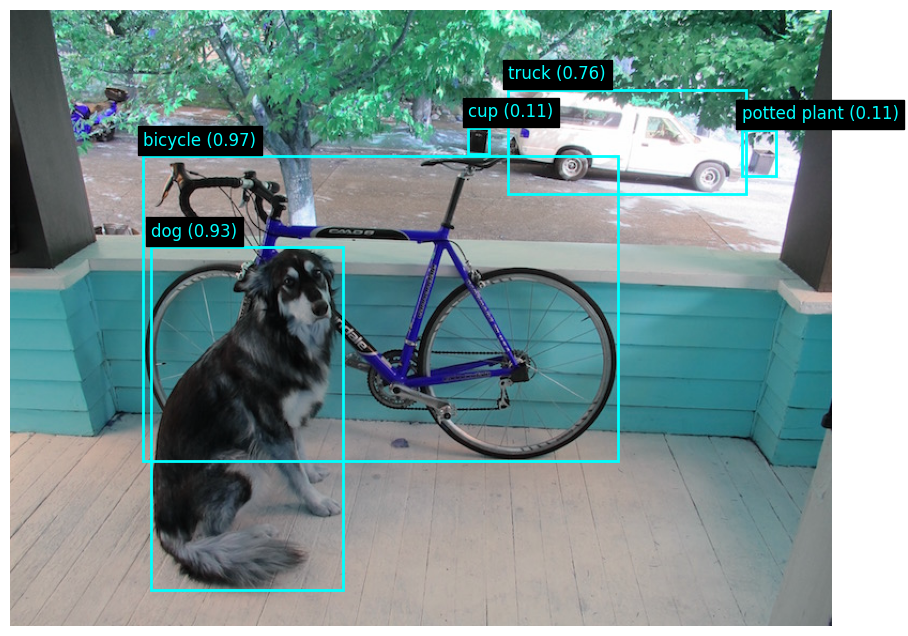

In [75]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Access the first result
result = results[0]

# Plot the original image
fig, ax = plt.subplots(1, figsize=(12, 8))
ax.imshow(result.orig_img)

# Extract and plot each bounding box
for i, (cls, conf, box) in enumerate(zip(result.boxes.cls, result.boxes.conf, result.boxes.xyxy)):
    # Convert class tensor to int and confidence to float
    cls_id = int(cls.item())
    conf_val = float(conf.item())
    x1, y1, x2, y2 = box.tolist()
    
    # Get label
    label = result.names[cls_id]
    
    # Create a rectangle patch for the bounding box
    width, height = x2 - x1, y2 - y1
    rect = patches.Rectangle((x1, y1), width, height, linewidth=2, edgecolor='cyan', facecolor='none')
    ax.add_patch(rect)
    
    # Display the label and confidence
    ax.text(x1, y1 - 10, f"{label} ({conf_val:.2f})", color="cyan", fontsize=12, backgroundcolor="black")

# Show the plot
plt.axis("off")
plt.show()

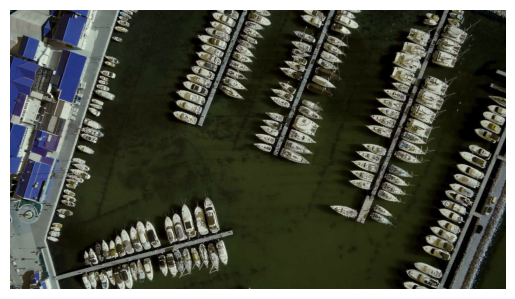

In [16]:
import matplotlib.pyplot as plt

# Visualize the results
for result in results:
    # Plot each result
    result.plot()

    # Alternatively, you can use matplotlib to display in Jupyter Notebooks or save the image
    plt.imshow(result.orig_img)  # Access the image with annotations
    plt.axis("off")
    plt.show()

In [34]:
from IPython.display import Image

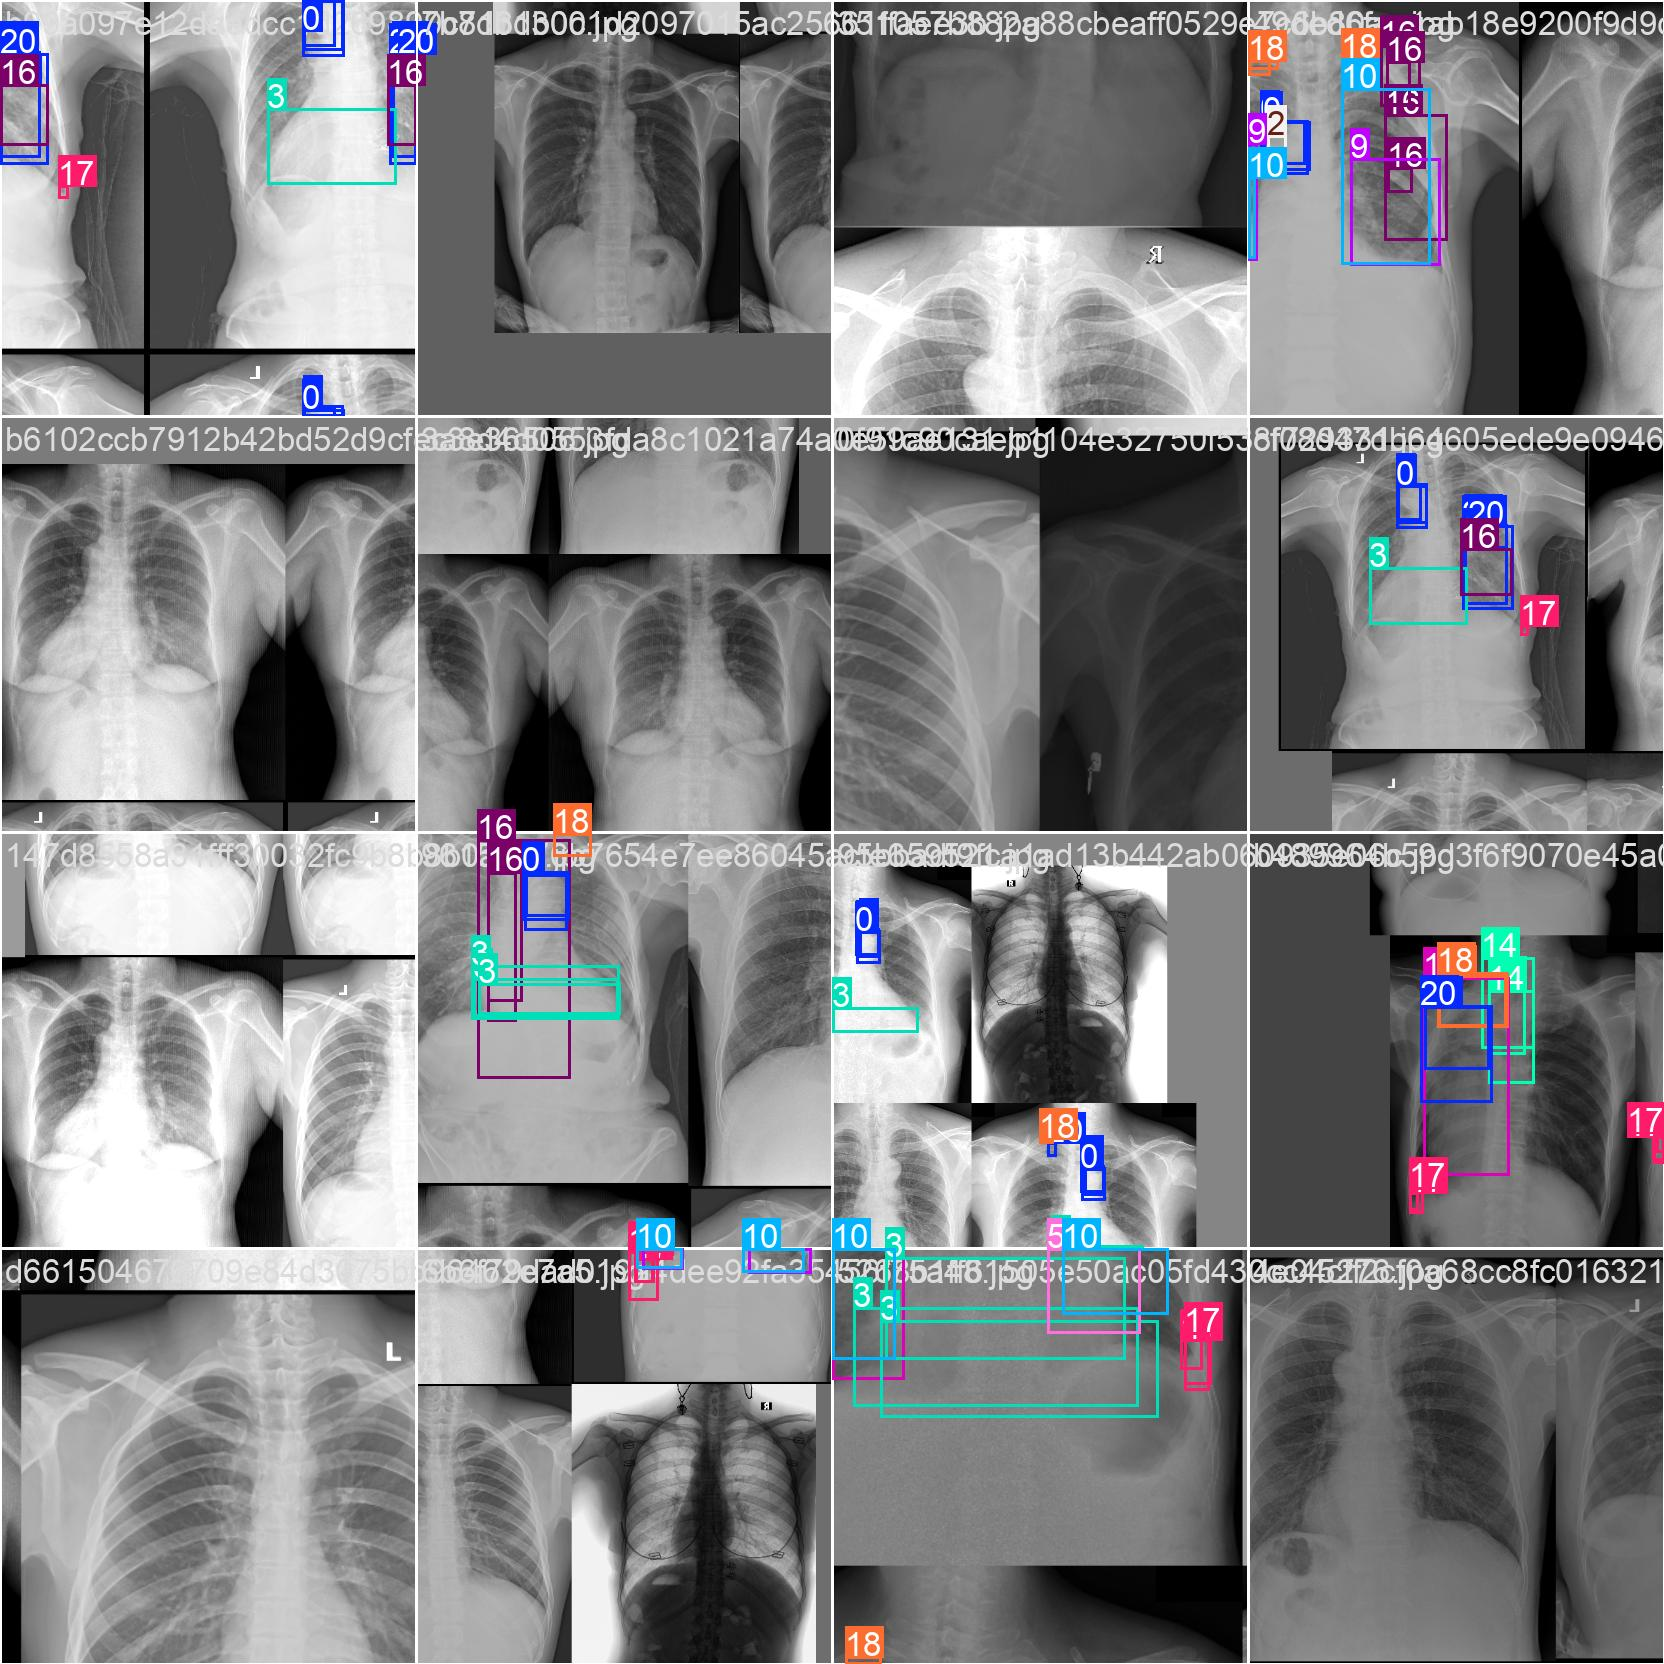

In [50]:
Image('/mnt/data/pamessina/workspaces/medvqa-workspace/cache/vinbig/yolov11/train3/train_batch1.jpg')

In [32]:
ls "/mnt/data/pamessina/workspaces/medvqa-workspace/cache/chest_imagenome/yolov11/train4"

args.yaml                                       train_batch0.jpg
events.out.tfevents.1731611617.calfuco.28720.0  train_batch1.jpg
labels_correlogram.jpg                          train_batch2.jpg
labels.jpg                                      weights/
results.csv


In [44]:
import pandas as pd
pd.read_csv('/mnt/data/pamessina/workspaces/medvqa-workspace/cache/chest_imagenome/yolov11/train4/results.csv')

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,3189.7,1.20016,0.86644,1.40118,0.91652,0.87083,0.91065,0.65991,1.00642,0.50577,1.31824,0.003333,0.003333,0.003333


In [58]:
# pd.read_csv('/mnt/data/pamessina/workspaces/medvqa-workspace/cache/vinbig/yolov11/train3/results.csv')
pd.read_csv('/mnt/data/pamessina/workspaces/medvqa-workspace/cache/vinbig/yolov11/train4/results.csv')

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,210.706,1.49720,1.56647,1.34638,0.20915,0.08213,0.03094,0.01400,2.90806,4.89326,2.64404,0.003328,0.003328,0.003328
1,2,393.173,1.54531,1.65299,1.36673,0.40558,0.10686,0.05061,0.01893,2.52565,3.95077,2.25988,0.006595,0.006595,0.006595
2,3,578.610,1.66314,1.91198,1.44209,0.57896,0.05909,0.03527,0.01324,2.55183,4.00086,2.29736,0.009797,0.009797,0.009797
3,4,764.173,1.70619,1.94008,1.46158,0.41920,0.09029,0.04784,0.01797,2.40232,3.68033,2.15958,0.009703,0.009703,0.009703
4,5,954.580,1.69585,1.92488,1.46510,0.20325,0.11158,0.03852,0.01417,2.50638,3.91778,2.23999,0.009604,0.009604,0.009604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,18487.000,1.24410,1.06756,1.25964,0.21538,0.15164,0.10310,0.04057,2.40406,3.23973,2.23600,0.000595,0.000595,0.000595
96,97,18674.800,1.23310,1.05388,1.24871,0.21441,0.14994,0.10281,0.04049,2.40596,3.24414,2.23962,0.000496,0.000496,0.000496
97,98,18861.800,1.23215,1.04356,1.24622,0.21405,0.15110,0.10287,0.04058,2.40904,3.24793,2.24339,0.000397,0.000397,0.000397
98,99,19051.000,1.22214,1.03717,1.24310,0.21287,0.15239,0.10291,0.04033,2.41065,3.25278,2.24730,0.000298,0.000298,0.000298


In [87]:
from ultralytics import YOLO
from collections import defaultdict

class FeatureExtractor:
    def __init__(self, model_path, layer_names=None):
        self.model = YOLO(model_path)
        self.features = defaultdict(list)
        self.hooks = []
        self.layer_names = layer_names or []  # Specify which layers to track
        
        # Register hooks for desired layers
        for name, module in self.model.model.named_modules():
            if not self.layer_names or name in self.layer_names:
                hook = module.register_forward_hook(
                    lambda m, inp, out, name=name: self.features[name].append(out)
                )
                self.hooks.append(hook)
    
    def get_features(self):
        """Get stored features and clear buffer"""
        features = dict(self.features)
        self.features.clear()
        return features
    
    def predict(self, *args, **kwargs):
        """Run prediction and return both detection results and features"""
        results = self.model.predict(*args, **kwargs)
        return results, self.get_features()
    
    def cleanup(self):
        """Remove hooks when done"""
        for hook in self.hooks:
            hook.remove()

# Usage example
# Track specific layers
layer_names = ['model.2', 'model.6', 'model.10', 'model.22']  # Example layer names
extractor = FeatureExtractor("yolo11l.pt", layer_names)

# Run prediction and get both results and features
results, features = extractor.predict("https://djl.ai/examples/src/test/resources/dog_bike_car.jpg")

# Clean up when done
extractor.cleanup()


Found https://djl.ai/examples/src/test/resources/dog_bike_car.jpg locally at dog_bike_car.jpg
image 1/1 /home/pamessina/medvqa/medvqa/models/notebooks/dog_bike_car.jpg: 480x640 1 bicycle, 1 truck, 1 dog, 21.1ms
Speed: 1.5ms preprocess, 21.1ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


In [81]:
features['model.2'][0].shape

torch.Size([1, 256, 160, 160])

In [82]:
features['model.6'][0].shape

torch.Size([1, 512, 40, 40])

In [83]:
features['model.10'][0].shape

torch.Size([1, 512, 20, 20])

In [88]:
features['model.22'][0].shape

torch.Size([1, 512, 20, 20])

In [89]:
features['model.22'][0]

tensor([[[[-1.9681e-01, -2.2335e-01, -2.5980e-01,  ..., -2.7812e-01, -2.7840e-01, -2.5613e-01],
          [ 3.2453e-02, -3.3241e-02, -3.7143e-02,  ..., -1.5210e-01, -2.3460e-01, -1.8400e-01],
          [-4.7042e-02, -1.2773e-01, -1.1829e-01,  ..., -9.9525e-02, -2.2882e-01, -1.1893e-01],
          ...,
          [-2.4728e-02, -1.2470e-01, -1.3723e-01,  ...,  9.5091e-03, -8.0147e-02, -4.5704e-02],
          [-1.6988e-01, -1.8004e-01, -1.9660e-01,  ..., -1.2840e-01, -2.2032e-01, -2.1496e-01],
          [-1.3555e-01, -8.4133e-02, -7.4913e-02,  ..., -2.3237e-01, -2.7486e-01, -2.5199e-01]],

         [[ 5.1117e-01,  5.9496e-01,  1.3813e+00,  ...,  6.0543e-01,  6.2666e-01,  1.1565e+00],
          [ 1.0285e+00,  1.5704e+00,  1.4286e+00,  ...,  8.2272e-01,  1.1171e+00,  1.2763e+00],
          [ 9.1993e-01,  2.1382e+00,  2.0581e+00,  ...,  1.5420e+00,  1.8919e+00,  1.7243e+00],
          ...,
          [ 2.0497e+00,  2.0473e+00,  2.5749e+00,  ...,  1.1216e+00,  1.5890e+00,  1.6967e+00],
        

In [84]:
extractor.model

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
      (2): C3k2(
        (cv1): Conv(
          (conv): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (m): ModuleList(
          (0-1): 2 x C3k(
            (cv1): Conv(
              (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
              (act): SiLU(inplace=True)
            )
            (cv2): Conv(
              (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
              (act): SiLU(inplace=True)
            )
            (cv3

In [94]:
model = YOLO('yolo11l.pt')

In [99]:
model.model.model[-1].__class__()

Detect(
  (cv2): ModuleList(
    (0): Sequential(
      (0): Conv(
        (conv): Conv2d(256, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
    )
    (1-2): 2 x Sequential(
      (0): Conv(
        (conv): Conv2d(512, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)

In [55]:
import torch
import torch.nn as nn
from ultralytics import YOLO
from ultralytics.utils.ops import non_max_suppression
from collections import defaultdict
from typing import Dict, List, Optional, Tuple, Union
from PIL import Image
import numpy as np

class YOLOBackbone(nn.Module):
    """YOLO backbone with configurable number of classes and feature extraction"""
    def __init__(
        self, 
        model_path: str,
        num_classes: int,
        image_size: int,
        feature_layers: Optional[List[str]] = None
    ):
        super().__init__()
        # Initialize YOLO
        yolo = YOLO(model_path)
        self.model = yolo.model
        
        # Replace the detection head with new number of classes
        original_detect = self.model.model[-1]  # Get original detection layer
        self.original_detect = original_detect
        
        original_f = original_detect.f
        f_layers = [f'model.{x}' for x in original_f]
        
        dims = get_feature_dimensions(model_path, f_layers, image_size)
        in_channels = [dims[x] for x in f_layers]
        print(f'in_channels: {in_channels}')
        
        # Create new detection layer
        new_detect = type(original_detect)(
            nc=num_classes,  # number of classes
            ch=in_channels   # input channels
        )
        
        # Copy over the connection information
        if hasattr(original_detect, 'f'):
            new_detect.f = original_detect.f
        
        # Copy over DFL layer if it exists (for newer YOLO versions)
        if hasattr(original_detect, 'dfl'):
            new_detect.dfl = original_detect.dfl
        
        # Replace the detection head
        self.model.model[-1] = new_detect        
        new_detect.i = len(self.model.model) - 1 # Assign index manually
        
        # Feature extraction setup
        self.features = {}
        self.hooks = []
        self.feature_layers = feature_layers or []
        
        # Register hooks for feature extraction
        def hook_fn(name):
            def hook(module, input, output):
                self.features[name] = output
            return hook
        
        for name, module in self.model.named_modules():
            if name in self.feature_layers:
                self.hooks.append(module.register_forward_hook(hook_fn(name)))
    
    def forward(self, x: torch.Tensor) -> Tuple[torch.Tensor, Dict[str, torch.Tensor]]:
        self.features.clear()
        detection_output = self.model(x)
        features = {k: v[0] for k, v in self.features.items()}
        return detection_output, features
    
    def cleanup(self):
        for hook in self.hooks:
            hook.remove()

class MultiTaskHead(nn.Module):
    """Custom head for additional tasks using backbone features"""
    def __init__(
        self, 
        feature_dims: Dict[str, int],
        num_classes: int,
        hidden_dims: List[int] = [512, 256]
    ):
        super().__init__()
        
        # Create feature processors for each input feature
        self.feature_processors = nn.ModuleDict()
        for layer_name, dim in feature_dims.items():
            safe_name = layer_name.replace('.', '_')
            self.feature_processors[safe_name] = nn.Sequential(
                nn.AdaptiveAvgPool2d(1),  # Global average pooling
                nn.Flatten(),
                nn.Linear(dim, hidden_dims[0])
            )
        
        # Combined feature processor
        self.combined_processor = nn.Sequential(
            nn.Linear(hidden_dims[0] * len(feature_dims), hidden_dims[1]),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(hidden_dims[1], num_classes),
            nn.Sigmoid()
        )
    
    def forward(self, features: Dict[str, torch.Tensor]) -> torch.Tensor:
        # Process each feature
        processed_features = []
        for layer_name, processor in self.feature_processors.items():
            safe_name = layer_name.replace('.', '_')
            if safe_name in features:
                processed = processor(features[safe_name])
                processed_features.append(processed)
        
        # Combine processed features
        combined = torch.cat(processed_features, dim=1)
        return self.combined_processor(combined)

class MultiTaskYOLO(nn.Module):
    """Complete multi-task model combining YOLO backbone with custom heads"""
    def __init__(
        self,
        model_path: str,
        detection_classes: int,
        multilabel_classes: int,
        feature_layers: Optional[List[str]] = None,
        feature_dims: Optional[Dict[str, int]] = None
    ):
        super().__init__()
        
        # Initialize backbone
        self.backbone = YOLOBackbone(
            model_path=model_path,
            num_classes=detection_classes,
            feature_layers=feature_layers
        )
        
        # Initialize multi-label classification head
        if feature_dims is None:
            # You'll need to run a forward pass to get these automatically
            raise ValueError("feature_dims must be provided")
            
        self.multilabel_head = MultiTaskHead(
            feature_dims=feature_dims,
            num_classes=multilabel_classes
        )
    
    def forward(self, x: torch.Tensor) -> Dict[str, torch.Tensor]:
        # Get backbone outputs
        detection_output, features = self.backbone(x)
        
        # Get multilabel classification output
        multilabel_output = self.multilabel_head(features)
        
        return {
            'detection': detection_output,
            'multilabel': multilabel_output,
            'features': features
        }
    
    def compute_loss(
        self,
        outputs: Dict[str, torch.Tensor],
        detection_targets: torch.Tensor,
        multilabel_targets: torch.Tensor,
        detection_loss_weight: float = 1.0,
        multilabel_loss_weight: float = 1.0
    ) -> Tuple[torch.Tensor, Dict[str, float]]:
        # Compute detection loss (assuming YOLO's built-in loss)
        detection_loss = outputs['detection'].loss
        
        # Compute multilabel loss
        multilabel_loss = nn.BCELoss()(
            outputs['multilabel'],
            multilabel_targets
        )
        
        # Combine losses
        total_loss = (detection_loss * detection_loss_weight + 
                     multilabel_loss * multilabel_loss_weight)
        
        loss_dict = {
            'detection_loss': detection_loss.item(),
            'multilabel_loss': multilabel_loss.item(),
            'total_loss': total_loss.item()
        }
        
        return total_loss, loss_dict
    
    def cleanup(self):
        self.backbone.cleanup()
        
    @torch.no_grad()
    def inference(
        self,
        image: Union[str, np.ndarray, torch.Tensor],
        conf_threshold: float = 0.25,
        iou_threshold: float = 0.45,
        max_detections: int = 300,
        device: str = 'cuda' if torch.cuda.is_available() else 'cpu'
    ) -> Dict[str, Union[torch.Tensor, List[Dict]]]:
        """
        Run inference on an image with configurable thresholds and NMS
        
        Args:
            image: Path to image, numpy array, or torch tensor
            conf_threshold: Confidence threshold for detection
            iou_threshold: IoU threshold for NMS
            max_detections: Maximum number of detections to return
            device: Device to run inference on
            
        Returns:
            Dictionary containing detection results and multilabel predictions
        """
        # Move model to device if not already there
        self.to(device)
        self.eval()
        
        # Prepare image
        if isinstance(image, str):
            image = Image.open(image).convert('RGB')
            image = np.array(image)
        if isinstance(image, np.ndarray):
            image = torch.from_numpy(image).permute(2, 0, 1).float() / 255.0
        
        # Add batch dimension if needed
        if image.dim() == 3:
            image = image.unsqueeze(0)
        
        # Move image to device
        image = image.to(device)
        
        # Run inference
        outputs = self(image)
        detection_output = outputs['detection']
        
        # Process YOLO detection outputs
        # Assuming detection_output format matches YOLO's output format:
        # (batch_size, num_boxes, 5 + num_classes) where 5 is [x, y, w, h, confidence]
        predictions = detection_output[0]  # Get first batch item
        
        # Apply NMS
        nms_predictions = non_max_suppression(
            predictions,
            conf_thres=conf_threshold,
            iou_thres=iou_threshold,
            max_det=max_detections
        )
        
        # Convert predictions to a more readable format
        detection_results = []
        for pred in nms_predictions:  # Loop through batch
            batch_detections = []
            if pred is not None and len(pred) > 0:
                for det in pred:  # Loop through detections
                    box = det[:4].cpu()  # x1, y1, x2, y2
                    conf = det[4].cpu()  # confidence
                    cls = det[5].cpu()   # class
                    batch_detections.append({
                        'bbox': box.numpy(),
                        'confidence': conf.item(),
                        'class_id': int(cls.item())
                    })
            detection_results.append(batch_detections)
        
        # Process multilabel classification outputs
        multilabel_probs = outputs['multilabel'].cpu()
        
        return {
            'detections': detection_results,
            'multilabel_probs': multilabel_probs,
            'features': {k: v.cpu() for k, v in outputs['features'].items()}
        }

# Example usage
def get_feature_dimensions(model_path: str, feature_layers: List[str], image_size: int = 640):
    """Helper function to get feature dimensions for initialization"""
    temp_model = YOLO(model_path).model
    dummy_input = torch.randn(1, 3, image_size, image_size)
    features = {}
    
    def hook_fn(name):
        def hook(module, input, output):
            features[name] = output.shape[1]  # Get channel dimension
        return hook
    
    hooks = []
    for name, module in temp_model.named_modules():
        if name in feature_layers:
            hooks.append(module.register_forward_hook(hook_fn(name)))
    
    temp_model(dummy_input)
    
    for hook in hooks:
        hook.remove()
    
    return features

# Example initialization and training
def training_example():
    # Configuration
    model_path = "yolo11l.pt"
    feature_layers = ['model.2', 'model.6', 'model.10']
    detection_classes = 80  # COCO classes
    multilabel_classes = 20  # Custom multilabel classes
    
    # Get feature dimensions
    feature_dims = get_feature_dimensions(model_path, feature_layers)
    
    # Initialize model
    model = MultiTaskYOLO(
        model_path=model_path,
        detection_classes=detection_classes,
        multilabel_classes=multilabel_classes,
        feature_layers=feature_layers,
        feature_dims=feature_dims
    )
    
    # Training loop example
    optimizer = torch.optim.Adam(model.parameters())
    
    for epoch in range(num_epochs):
        for batch_images, detection_targets, multilabel_targets in dataloader:
            optimizer.zero_grad()
            
            # Forward pass
            outputs = model(batch_images)
            
            # Compute loss
            loss, loss_dict = model.compute_loss(
                outputs,
                detection_targets,
                multilabel_targets,
                detection_loss_weight=1.0,
                multilabel_loss_weight=0.5
            )
            
            # Backward pass
            loss.backward()
            optimizer.step()
    
    model.cleanup()
    
# Example usage with proper NMS
def inference_example():
    # Configuration
    model_path = "yolo11l.pt"
    feature_layers = ['model.2', 'model.6', 'model.10']
    detection_classes = 80  # COCO classes
    multilabel_classes = 20  # Custom multilabel classes
    
    # Get feature dimensions
    feature_dims = get_feature_dimensions(model_path, feature_layers)
    
    # Initialize model
    model = MultiTaskYOLO(
        model_path=model_path,
        detection_classes=detection_classes,
        multilabel_classes=multilabel_classes,
        feature_layers=feature_layers,
        feature_dims=feature_dims
    )
    
    # Run inference with custom thresholds
    results = model.inference(
        image="dog_bike_car.jpg",
        conf_threshold=0.3,    # Minimum confidence threshold
        iou_threshold=0.4,     # NMS IoU threshold
        max_detections=100,    # Maximum detections to return
        device='cuda'
    )
    
    # Process results
    detections = results['detections'][0]  # Get first image's detections
    multilabel_probs = results['multilabel_probs'][0]  # Get first image's multilabel predictions
    
    # Print detection results
    print("\nDetection Results:")
    for det in detections:
        print(
            f"Box: {det['bbox']}, "
            f"Confidence: {det['confidence']:.2f}, "
            f"Class: {det['class_id']}"
        )
    
    # Print multilabel classification results
    print("\nMultilabel Classification Results:")
    for i, prob in enumerate(multilabel_probs):
        if prob > 0.5:  # Threshold for multilabel classification
            print(f"Class {i}: {prob:.2f}")
    
    # Cleanup
    model.cleanup()

In [10]:
get_feature_dimensions("yolo11l.pt", ['model.16', 'model.19', 'model.22'], 640)

{'model.16': 256, 'model.19': 512, 'model.22': 512}

In [56]:
# Initialize the model
yolobackbone = YOLOBackbone(
    model_path="yolo11l.pt",
    num_classes=22,
    image_size=640,
    feature_layers=['model.2', 'model.6', 'model.10'],
)

in_channels: [256, 512, 512]
DEBUGGING: from ultralytics.nn.modules.head.py: Detect class, nc: 22, ch: [256, 512, 512]


In [57]:
# Prepare the image
image = Image.open('dog_bike_car.jpg').convert('RGB')
image = image.resize((640, 640))
image = np.array(image)
image = torch.from_numpy(image).permute(2, 0, 1).float() / 255.0
image = image.unsqueeze(0)
assert image.ndim == 4

In [58]:
yolobackbone.original_detect.f

[16, 19, 22]

In [59]:
yolobackbone.original_detect.i

23

In [60]:
yolobackbone.model.model[-1].f

[16, 19, 22]

In [61]:
len(yolobackbone.model.model) - 1

23

In [62]:
# Run inference
detection_output, features = yolobackbone.forward(image)

In [63]:
print(len(detection_output))
for x in detection_output:
    print(x.shape)

3
torch.Size([1, 86, 80, 80])
torch.Size([1, 86, 40, 40])
torch.Size([1, 86, 20, 20])


In [64]:
for k, v in features.items():
    print(k, v.shape)

model.2 torch.Size([256, 160, 160])
model.6 torch.Size([512, 40, 40])
model.10 torch.Size([512, 20, 20])


In [65]:
yolobackbone.eval()

YOLOBackbone(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C3k2(
        (cv1): Conv(
          (conv): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(256, eps=0.001, momentum=0.03, affine=True

In [73]:
with torch.no_grad():
    detection_output, features = yolobackbone.forward(image)

In [74]:
len(detection_output)

2

In [81]:
detection_output[0].shape

torch.Size([1, 26, 8400])

In [82]:
from ultralytics.utils.ops import non_max_suppression

In [84]:
output = non_max_suppression(detection_output[0].detach(), conf_thres=0.1, iou_thres=0.1, max_det=22)

In [87]:
output[0]

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.5164, 6.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.5162, 6.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.5160, 6.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.5159, 8.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.5157, 6.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.5156, 6.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.5156, 6.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.5155, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.5155, 6.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.5155, 8.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.5154, 6.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.5153, 6.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.5153, 6.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.5153, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.5152, 6.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.5152, 8.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.5152, 6.0000],
        [0.000

In [115]:
from ultralytics.nn.tasks import attempt_load_one_weight, DetectionModel

In [111]:
# Load weights and config
model_name_or_path = 'yolo11l.pt'
ckpt = None
if str(model_name_or_path).endswith('.pt'):
    model, ckpt = attempt_load_one_weight(model_name_or_path)
    cfg = ckpt['model'].yaml
else:
    cfg = model_name_or_path

In [130]:
from types import SimpleNamespace
SimpleNamespace(**model.args)

namespace(task='detect',
          mode='train',
          model='yolo11l.yaml',
          data='/ultralytics/ultralytics/cfg/datasets/coco.yaml',
          epochs=600,
          time=None,
          patience=100,
          batch=128,
          imgsz=640,
          save=True,
          save_period=-1,
          cache='disk',
          device=(0, 1),
          workers=8,
          project='YOLO11',
          name='yolo11l',
          exist_ok=False,
          pretrained=True,
          optimizer='auto',
          verbose=True,
          seed=0,
          deterministic=True,
          single_cls=False,
          rect=False,
          cos_lr=False,
          close_mosaic=10,
          resume=False,
          amp=True,
          fraction=1.0,
          profile=False,
          freeze=None,
          multi_scale=False,
          overlap_mask=True,
          mask_ratio=4,
          dropout=0.0,
          val=True,
          split='val',
          save_json=False,
          save_hybrid=False,

In [128]:
model.args['box']

7.5

In [123]:
model

DetectionModel(
  (model): Sequential(
    (0): Conv(
      (conv): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (1): Conv(
      (conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (2): C3k2(
      (cv1): Conv(
        (conv): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (cv2): Conv(
        (conv): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(256, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
   

In [104]:
ckpt.keys()

dict_keys(['date', 'version', 'license', 'docs', 'epoch', 'best_fitness', 'model', 'ema', 'updates', 'optimizer', 'train_args', 'train_metrics', 'train_results'])

In [113]:
model.stride

tensor([ 8., 16., 32.])

In [114]:
model

DetectionModel(
  (model): Sequential(
    (0): Conv(
      (conv): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (1): Conv(
      (conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (2): C3k2(
      (cv1): Conv(
        (conv): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (cv2): Conv(
        (conv): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(256, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
   

In [117]:
import copy
cfg = ckpt['model'].yaml
cfg_ = copy.deepcopy(cfg)

In [127]:
model.args

{'task': 'detect',
 'mode': 'train',
 'model': 'yolo11l.yaml',
 'data': '/ultralytics/ultralytics/cfg/datasets/coco.yaml',
 'epochs': 600,
 'time': None,
 'patience': 100,
 'batch': 128,
 'imgsz': 640,
 'save': True,
 'save_period': -1,
 'cache': 'disk',
 'device': (0, 1),
 'workers': 8,
 'project': 'YOLO11',
 'name': 'yolo11l',
 'exist_ok': False,
 'pretrained': True,
 'optimizer': 'auto',
 'verbose': True,
 'seed': 0,
 'deterministic': True,
 'single_cls': False,
 'rect': False,
 'cos_lr': False,
 'close_mosaic': 10,
 'resume': False,
 'amp': True,
 'fraction': 1.0,
 'profile': False,
 'freeze': None,
 'multi_scale': False,
 'overlap_mask': True,
 'mask_ratio': 4,
 'dropout': 0.0,
 'val': True,
 'split': 'val',
 'save_json': False,
 'save_hybrid': False,
 'conf': None,
 'iou': 0.7,
 'max_det': 300,
 'half': False,
 'dnn': False,
 'plots': True,
 'source': None,
 'vid_stride': 1,
 'stream_buffer': False,
 'visualize': False,
 'augment': False,
 'agnostic_nms': False,
 'classes': None,

In [118]:
det_model = DetectionModel(cfg_, ch=3, nc=22, verbose=True)

Overriding model.yaml nc=80 with nc=22

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  2    173824  ultralytics.nn.modules.block.C3k2            [128, 256, 2, True, 0.25]     
  3                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  4                  -1  2    691712  ultralytics.nn.modules.block.C3k2            [256, 512, 2, True, 0.25]     
  5                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  6                  -1  2   2234368  ultralytics.nn.modules.block.C3k2            [512, 512, 2, True]           
  7                  -1  1   2360320  ultralytic

In [119]:
det_model.load(model)

Transferred 1009/1015 items from pretrained weights
